# Image Compresion Using K-Means

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
image = cv2.cvtColor(cv2.imread("./tiger.png", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB).astype(float) / 255.0

image_matrix = np.array(image)

image_shape = image.shape

print(image_shape)

(328, 584, 3)


In [4]:
data = image_matrix.reshape(-1,3)
data.shape

(191552, 3)

In [5]:
psnr_array = []

for n_clusters in range(2, data.shape[0]+1, 5):

    km = KMeans(n_clusters=n_clusters, random_state=42)

    km.fit(data)

    comperesed_data = km.labels_

    centroids = km.cluster_centers_

    comperesed_matrix = km.cluster_centers_[km.predict(data)]

    comperesed_image = comperesed_matrix.reshape(image_shape)

    psnr = (cv2.PSNR(image, comperesed_image))

    psnr_array.append(psnr)

    max_n_clusters = n_clusters
    
    if psnr > 80:
        break

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

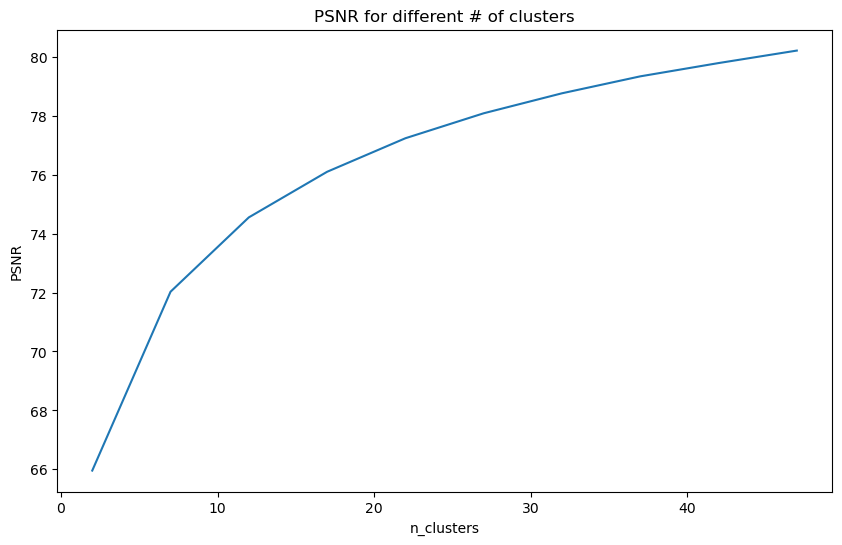

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(2, max_n_clusters+5, 5), y=psnr_array)
plt.title('PSNR for different # of clusters')
plt.xlabel('n_clusters')
plt.ylabel('PSNR')
plt.show()

In [7]:
km = KMeans(n_clusters=max_n_clusters, random_state=42)

km.fit(data)

comperesed_data = km.labels_

centroids = km.cluster_centers_

comperesed_matrix = km.cluster_centers_[km.predict(data)]

comperesed_image = comperesed_matrix.reshape(image_shape)

combined_matrix = np.hstack((image_matrix, comperesed_image))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
print(f"Best n_cluster: {max_n_clusters}")

Best n_cluster: 47


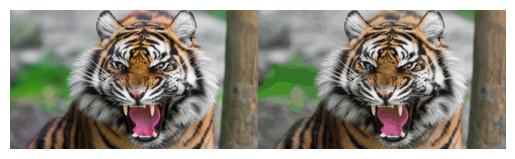

In [9]:
plt.imshow(combined_matrix)
plt.axis('off')
plt.show()